**Name**: Benson Onwudegu                                                  
**Project Title**: Design Of Convolutional Neural Network (CNN) For Image Classification                                                              
**Date**: February 16th, 2021

The aim of this analysis is to generate the Jupyter Notebook to explore the application of Convolutional Neural Networks (CNN) for Image Classification.

During this exploration of the dataset, two specific algorithms or architectures will be utilzed, which are LeNet and AlexNet algorithm.

**•	Introduction**

The aim of this analysis is to generate the Jupyter Notebook to explore the application of Convolutional Neural Networks (CNN) for Image Classification.

During this exploration of the dataset, two specific algorithms or architectures will be utilzed, which are LeNet and AlexNet algorithm.

**•	The selected dataset for the algorithm comparison**

The Selected Dataset that was used for the exploration of the Convolutional Neural Network and comparison between the two algorithms is the MNIST DATASET.

MNIST stands for Modified National Institute of Standards and Technology database.                                                       

The MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Cen‐sus Bureau. Each image is labeled with the digit it represents.                                        

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST’s (National Institute of Standards and Technology database) training dataset, while the other half of the training set and the other half of the test set were taken from NIST’s testing dataset.

**•	The algorithms to compare with appropriate reasoning why they were chosen**



*-----LeNet Algorithm*                                            

I have chosen the LeNet Algorithm for the following reasons.

1. The LeNet Algorithm or Architecture is the most widely known CNN architecture and it is used for hand‐written digit recognition such as for(MNIST).                                                          
2. The LeNet architecture can be seen to be straightforward and small, it can as well run on the CPU (if your system does not have a suitable GPU).                                                            
3. Also, if you happen to have GPU support and can access your GPU via Keras, you will enjoy extremely fast training times (in the order of 3-10 seconds per epoch, depending on your GPU).                                    

*-----AlexNet Algorithm:*                                                     

I have chosen this algorithm for the following reasons below.

1. It Uses Relu to add non-linearity and the training process to be accelerated as gradient descent optimization takes place at a faster rate in comparison to other standard non-linearity techniques.                              

2. It Uses dropout instead of regularisation to deal with overfitting. However the training time is doubled with the dropout rate of 0.3.

3. It uses an Overlap pooling to reduce the size of network. It reduces the top-1 and top-5 error rates by 0.4% and 0.3%, repectively.

**Starting With The LeNet Algorithm**

At this point, we shall begin the training and testing of our algorithms with LeNet Algorithm by importing all necessary libraries for a smooth process.          

**We are to Import The Necessary Libraries**                           
We would be importing the numerical and tensorflow libraries for a smooth building of our model

**•	Algorithmic performance evaluation and comparison**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

**We are Downloading the Dataset in the step below**                       
We would be Loading MNIST and splitting into training and testing datasets

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

**Reshaping image dimensions**                                   
Due to its Flattend 28 x 28 = 784image, we are to recover our original image from the 784-d vector, we simply reshape the array into a 28 x 28 image.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**Normalization**                                        
We will convert the data into float32 and normalize the pixels as well so that they fall in the range [0.0, 255.0]. Finally, we will one-hot encode the labels which will range from 0 to 9.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0


**Model Building**

**Now we are Defining a custom LeNet module**                           
LeNet consists of 7 layers – 2 convolutional and 2 average pooling layers, and then 2 fully connected layers and the output layer with activation function softmax. 

**NOTE:** MNIST images dimensions are 28 × 28 pixels, but they are zero-padded to 32 × 32 pixels and normalized before being fed forward to the network. Input image shrinks further down the network.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_10 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_51 (Dense)             (None, 10)              

**Model compilation**                                        
We will be using the 'adam' optimizer and the loss is going to be sparse_categorical_crossentropy.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**•	The training and testing of the algorithms**

**Fitting the model**                                             
We will train the model for 10 epochs

In [ ]:
model.fit(x_train, y_train, 
          epochs=10, 
          validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4784 - accuracy: 0.8623 - val_loss: 0.1263 - val_accuracy: 0.9616
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1079 - accuracy: 0.9684 - val_loss: 0.0736 - val_accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0683 - accuracy: 0.9803 - val_loss: 0.0569 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0378 - accuracy: 0.9887 - val_loss: 0.0431 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0373 - val_accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0366 - val_accuracy:

**Test the Model**                                              
Let's Test Our Model

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('ACCURACY: ', acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0363 - accuracy: 0.9891
ACCURACY:  0.9890999794006348


**Model prediction**                                               
Let's do a model prediction to see how well the model would perform.

In [ ]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0]))

7


We could see that our model has performed well with high accuracy and also predicted correctly.

We have been able to see how our model performed on the LeNet Algorithm, Next is for us to build our CNN with the AlexNet algorithm and compare their performance also.                                                
Below, are the steps we would be taking using the AlexNet algorithm.

**Starting The AlexNet Algorithm**

**•	Introduction**

The aim of this experiment is to demonstrate the architecture of the AlexNet model in building our convolutional neural network.

AlexNet architecture consists of 5 convolution layers and 3 fully connected layers and Relu will be used as the activation, except at the output which will be softmax.

**Import the Required Libraries**                                    
These libraries are relevant for us to have a good start with building our convolutional neural network on the AlexNet algorithm.

**•	Algorithmic performance evaluation and comparison**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Let's download the MNIST dataset**                                          
The MNIST dataset will be downloaded as we import these libraries below. 

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator

**This step is to load the image data**                           


We would be Loading MNIST dataset and splitting into training and testing datasets accordingly.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Let's verify what the dataset looks like**                                 
To verify that the dataset looks correct, let's plot the first 25 images from the training set.

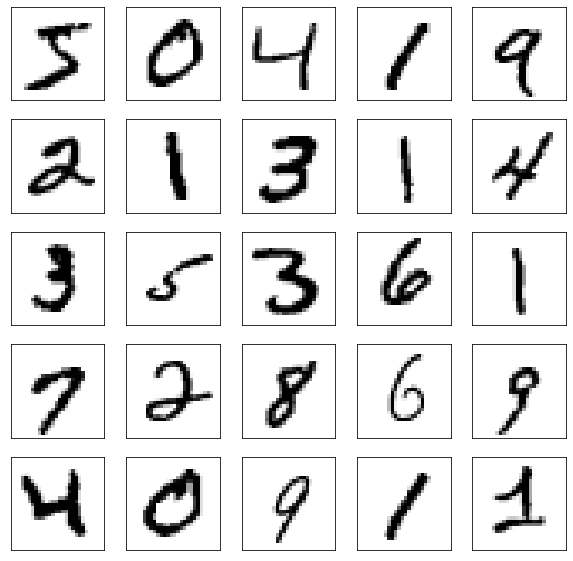

In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
      
   
plt.show()

From the step below, We will see that X_train is (60000, 28, 28), so that we have 60000 training images, each with a 28*28 resolution.                    
I will also be doing a Pre-processing of the data into desired format.            

                                                              
**Reshaping The data into (batch, height, width, channels)**

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

From the output above, We could see that we have 60000 training images and 10000 testing images.

Where X_train = Training Images                                       
      X_test = Test Images.

**Data Normalization**                                                 
We are Normalizing The data to float between 0 and 1 below.                
Original pixel values are between 0 and 255

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

For y_ train and y_test data, we want to convert them into categorical / one-hot variables below. In our case, we have 10 categories.                     
keras.utils.np_utils conveniently has this built in.

In [ ]:
classes = 10
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)

**Let's Verify the dimension after one hot encoding**                        
This is for us to be sure our data dimension is still intact after the convertion.

In [ ]:
print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))

((60000, 28, 28, 1), (60000, 10))
((10000, 28, 28, 1), (10000, 10))


**Building The Neural Network**                               
Instantiate a Sequential model                                        

In the step below, we would have to define the AlexNet network. The parameters of the network will be kept according to the descriptions below, that is 5 convolutional layers with kernel size 3 x 3, 3 x 3, 3 x 3 respectively, 3 fully connected layers, ReLU as an activation function at all layers except at the output layer, Also with an input shape of 28 x 28.                                         
Since we will test this model in MNIST classification, at the output layer we will define a Dense layer with 10 nodes.

In [ ]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

# 2nd Fully Connected Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

# 3rd Fully Connected Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

# Output Layer
# important to have dense 10, since we have 10 classes
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_90 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_91 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 18, 18, 64)      

**Let's Compile The Model**                                             
Now that our model is defined, we will compile this model and use adam as an optimizer.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

          
We would use ImageDataGenerator below to augment our input data which will help us reduce overfitting.

In [ ]:
gen = ImageDataGenerator(
            rotation_range=8,
            width_shift_range=0.08,
            shear_range=0.3,
            height_shift_range=0.08,
            zoom_range=0.08
            )
test_gen = ImageDataGenerator()

After preprocessing the MNIST dataset, the next is for us to train our defined AlexNet model.                                               
The learning rate annealer will be used in this experiment.The learning rate annealer decreases the learning rate after a certain number of epochs if the error rate does not change.                            
Through this technique, the validation accuracy will be monitored and if it seems to be a plateau in 3 epochs, it will reduce the learning rate by 0.01.                            

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

We would train our model by defining below the number of epochs, the number of batches and the learning rate.                      

In [ ]:
BATCH_SIZE = 64

EPOCHS = 5

# Generator to "flow" in the input images and labels into our model
# Takes batch_size as a parameter
train_generator = gen.flow(X_train, y_train, batch_size=BATCH_SIZE)
test_generator = test_gen.flow(X_test, y_test, batch_size=BATCH_SIZE)

**•	The training and testing of the algorithms**

**Now we are Training The Model**                                            
The Model is being trained with 5 epochs and batch size of 64.

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=60000//BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=test_generator,
        validation_steps=10000//BATCH_SIZE
        )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
937/937 [==============================] - 35s 36ms/step - loss: 0.6196 - accuracy: 0.8663 - val_loss: 0.2467 - val_accuracy: 0.9162
Epoch 2/5
937/937 [==============================] - 33s 35ms/step - loss: 0.1758 - accuracy: 0.9667 - val_loss: 0.0592 - val_accuracy: 0.9858
Epoch 3/5
937/937 [==============================] - 33s 35ms/step - loss: 0.1180 - accuracy: 0.9744 - val_loss: 0.0545 - val_accuracy: 0.9864
Epoch 4/5
937/937 [==============================] - 33s 35ms/step - loss: 0.0909 - accuracy: 0.9789 - val_loss: 0.0359 - val_accuracy: 0.9901
Epoch 5/5
937/937 [==============================] - 33s 35ms/step - loss: 0.0760 - accuracy: 0.9805 - val_loss: 0.0407 - val_accuracy: 0.9892


After a Successful training above, we would visualize its Performance in the step below.

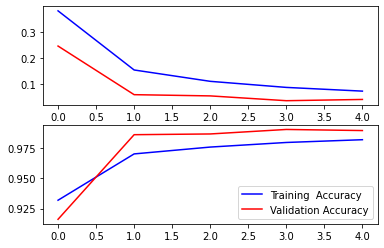

In [ ]:
import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

The classification performance will be seen using a non-normalized and a normalized confusion matrices. At this point, we will define a function below, through which the confusion matrices will be plotted.                                

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

At this point, we would be doing some Model Predictions in the following steps below.                                                            
We would predict the class labels for the test images on the trained AlexNet model.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization
Normalized confusion matrix


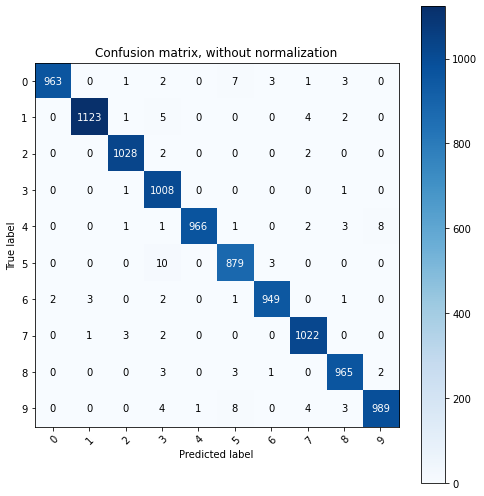

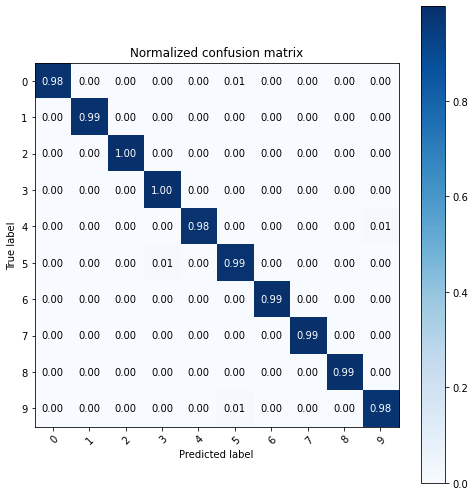

In [ ]:
#Making prediction
y_pred=model.predict_classes(X_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')


# Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

**Let's Test Our Model**

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.9892


In [ ]:
from keras.models import load_model

model.save('LeNet-AlexNet-MNIST')

INFO:tensorflow:Assets written to: LeNet-AlexNet-MNIST/assets


**• Conclusion**                                                      
We have successfully done a Classification of our model, using the LeNet and AlexNet algorithm.
Both algorithms uses different parameters, ranging from their seperate required libraries to number of layers and activations.
Their accuracies were quite good and high, also had good predictions. LeNet had a test accuracy of 98.91% and train accuracy of 99.58%.       

AlexNet also had train accuracy of 98.05% and a test accuracy of 98.92%.
Both Algorithms performed almost similar in-terms of their accuracies and predictions.                                                                                                            
I Could observer that the LeNet architecture trained much faster than the AlexNet architecture.                                        

A RAM Size of 2.20GB Was used in the execution process on a GPU machine.                                          

**Recommendations.**                                               
For further comparisons, i will suggest the following parameters stated below are put in place for better performance.

1. We can tune certain parameters like epochs, learning rate etc. The number of epochs definitely affect the performance of the models. For large number of epochs , there is improvement in performance.         

2. Also we can apply dropout layer in the CNN model.                 

3. There is need to tune your model with various optimizers such as rmsprop, SGD etc.                                         

4. It is very important to have large training data, because using large data prevents over fitting, and doing this will enable better performance for the model.                                         

At the end of the whole process, both Architectures were saved using the Keras library with a name as " LeNet-AlexNet-MNIST".
